In [45]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import numpy as np
import datetime
from ipyleaflet import Map, basemaps, basemap_to_tiles, CircleMarker
from ipywidgets import interact, interactive, fixed, interact_manual
import contextily as ctx
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

# Visualizando a Pandemia

## Baixando a Base Cartográfica

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


## Baixando os dados globais de casos Confirmados

In [3]:
confirmed = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmed = confirmed.groupby('Country/Region').sum()
confirmed_mundo = pd.merge(world,confirmed, left_on='name', right_on='Country/Region')
confirmed_mundo.to_file('../mapas/confirmados_mundo.gpkg',driver='GPKG')

In [4]:
conf_US = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
# conf_US.plot(column='3/30/20', legend=True, 
#                      legend_kwds={'orientation':'horizontal', 'label':'Confirmed Cases'});
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

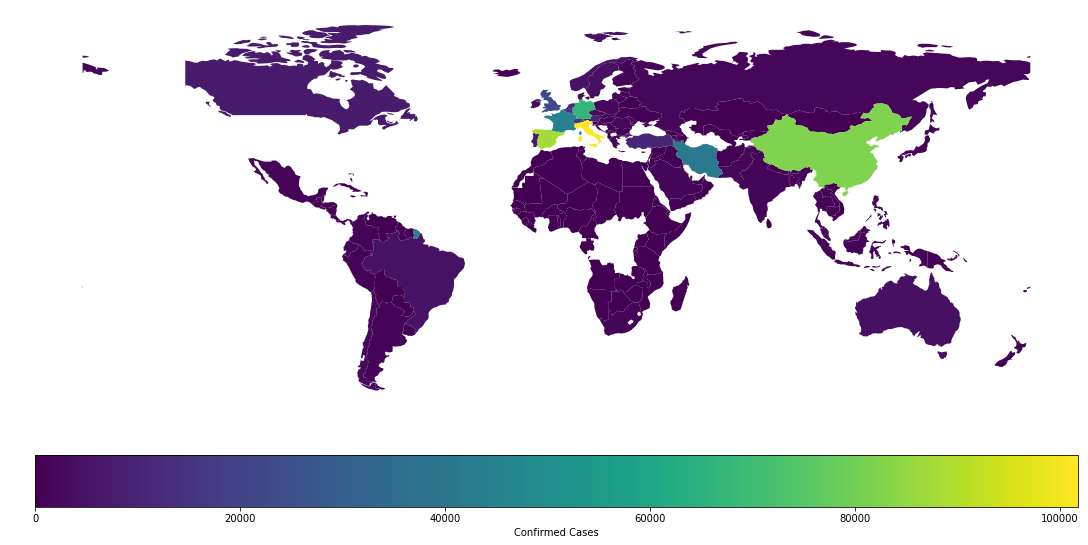

In [5]:
fig,ax = plt.subplots(1, 1, figsize=(15,15), constrained_layout=True)
confirmed_mundo.plot(ax=ax,column='3/30/20', legend=True, 
                     legend_kwds={'orientation':'horizontal', 'label':'Confirmed Cases'});

ax.set_axis_off()

## Baixando os dados globais de mortes pela COVID-19

In [6]:
mortes = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
mortes = mortes.groupby('Country/Region').sum()
mortes

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,...,15,18,18,21,23,25,30,30,30,33
Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,...,23,23,23,23,24,25,26,26,26,26
Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,...,256,275,293,313,326,336,348,364,367,375
Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,...,26,26,29,29,31,33,33,35,35,36
Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,3
Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
mortes_mundo = pd.merge(world,mortes, left_on='name', right_on='Country/Region')
mortes_mundo.to_file('../mapas/mortes_mundo.gpkg')

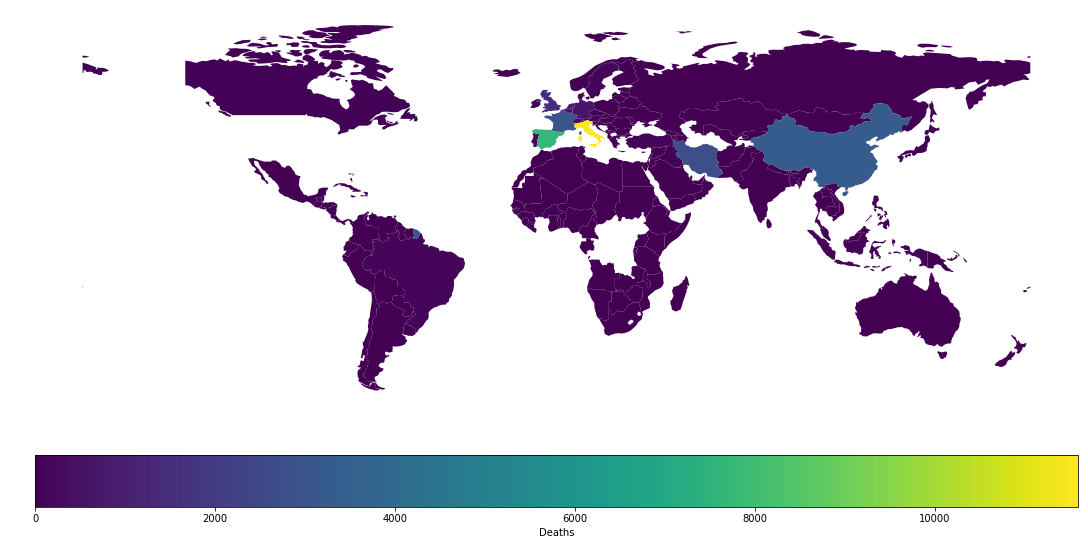

In [8]:
fig,ax = plt.subplots(1, 1, figsize=(15,15), constrained_layout=True)
mortes_mundo.plot(ax=ax,column='3/30/20', legend=True,
                 legend_kwds={'orientation':'horizontal', 'label':'Deaths'});
ax.set_axis_off()

In [9]:
from datetime import datetime
start_date = datetime(2020, 1, 22)
end_date = datetime(2020, 3, 30)

dates = pd.date_range(start_date, end_date, freq='D')

options = [date.strftime('%-m/%-d/%y') for date in dates]

selection_slider = widgets.SelectionSlider(
    options=options,
    description='Datas',
    orientation='horizontal',
    layout={'width': '500px'}
)
continent_sel = widgets.Select(
    options=list(set(world.continent))+['Todos'],
    value='Todos',
    # rows=10,
    description='Continentes:',
    disabled=False
)



@interact(date=selection_slider, normalizado=True, continente=continent_sel)
def plot_conf_cases(date, normalizado, continente):
    fig,ax = plt.subplots(1, 1, figsize=(15,15))
    if normalizado:
        if continente == 'Todos':
            dado = 1e5*confirmed_mundo[date]/confirmed_mundo['pop_est']
        else:
            dado = 1e5*confirmed_mundo[confirmed_mundo.continent==continente][date]/confirmed_mundo[confirmed_mundo.continent==continente]['pop_est']
        title = 'Casos confirmados por 100 mil'
    else:
        if continente == 'Todos':
            dado = confirmed_mundo[date]
        else:
            dado = confirmed_mundo[confirmed_mundo.continent==continente][date]
        title = 'Casos confirmados'
    if date in confirmed_mundo.columns:
        if continente == 'Todos':
            confirmed_mundo.plot(ax=ax, column=dado, 
                             alpha=.5, legend=True,
                             legend_kwds={'orientation':'horizontal', 'label':title}
                            );
        else:
            confirmed_mundo[confirmed_mundo.continent==continente].plot(ax=ax, column=dado, 
                             alpha=.5, legend=True,
                             legend_kwds={'orientation':'horizontal', 'label':title}
                            );

    ax.set_title(title)
    ax.set_axis_off()
   

interactive(children=(SelectionSlider(description='Datas', layout=Layout(width='500px'), options=('1/22/20', '…

In [10]:
confirmed_mundo[confirmed_mundo.continent=='North America']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Lat,Long,1/22/20,1/23/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
2,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",671.7607,-1237.6289,0,0,...,2790,3251,4042,4682,5576,6280,7398,8527,9560,11284
13,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169...",18.9712,-72.2852,0,0,...,7,8,8,8,8,15,15,15,16,16
15,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ...",25.0343,-77.3963,0,0,...,5,5,9,10,10,11,14,14,21,24
19,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",23.6345,-102.5528,0,0,...,367,405,475,585,717,848,993,1094,1215,1378
25,3753142,North America,Panama,PAN,93120.0,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...",8.5380,-80.7821,0,0,...,345,443,558,674,786,901,989,1181,1181,1317
26,4930258,North America,Costa Rica,CRI,79260.0,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681...",9.7489,-83.7534,0,0,...,177,201,231,263,295,314,330,347,375,396
27,6025951,North America,Nicaragua,NIC,33550.0,"POLYGON ((-83.65561 10.93876, -83.89505 10.726...",12.8654,-85.2072,0,0,...,2,2,2,2,4,4,4,5,5,5
28,9038741,North America,Honduras,HND,43190.0,"POLYGON ((-83.14722 14.99583, -83.48999 15.016...",15.2000,-86.2419,0,0,...,30,36,52,68,95,110,139,141,172,219
29,6172011,North America,El Salvador,SLV,54790.0,"POLYGON ((-89.35333 14.42413, -89.05851 14.340...",13.7942,-88.8965,0,0,...,5,9,13,13,19,24,30,32,32,41
30,15460732,North America,Guatemala,GTM,131800.0,"POLYGON ((-92.22775 14.53883, -92.20323 14.830...",15.7835,-90.2308,0,0,...,21,24,25,28,34,34,36,38,39,47


## Brasil

In [9]:
# Pegando os casos do Brasil.io
cases = pd.read_csv('https://brasil.io/dataset/covid19/caso?format=csv')
cases.date = pd.to_datetime(cases.date)

In [10]:
df_states = cases[cases.place_type!='state'].groupby(['date','state']).sum()
df_states.reset_index(inplace=True)
df_states.set_index('date', inplace=True)

In [34]:
df_states['cfr'] = df_states.deaths/df_states.confirmed
df_states

,state,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,cfr,data
date,,,,,,,,,,
2020-02-25,SP,1,0,0.0,12252023.0,3550308.0,0.00816,0.0000,0.000000,2020-02-25
2020-02-26,SP,1,0,0.0,12252023.0,3550308.0,0.00816,0.0000,0.000000,2020-02-26
2020-02-27,SP,1,0,0.0,12252023.0,3550308.0,0.00816,0.0000,0.000000,2020-02-27
2020-02-28,SP,2,0,0.0,12252023.0,3550308.0,0.01632,0.0000,0.000000,2020-02-28
2020-02-29,SP,2,0,0.0,12252023.0,3550308.0,0.01632,0.0000,0.000000,2020-02-29
...,...,...,...,...,...,...,...,...,...,...
2020-04-19,RS,869,26,99.0,8163171.0,426871596.0,1345.40426,3.7168,0.029919,2020-04-19
2020-04-19,SC,1025,35,101.0,5530120.0,420990202.0,1952.98635,5.0069,0.034146,2020-04-19
2020-04-19,SE,86,5,14.0,1449648.0,39252871.0,75.90268,0.2345,0.058140,2020-04-19


In [12]:
import plotly.express as px

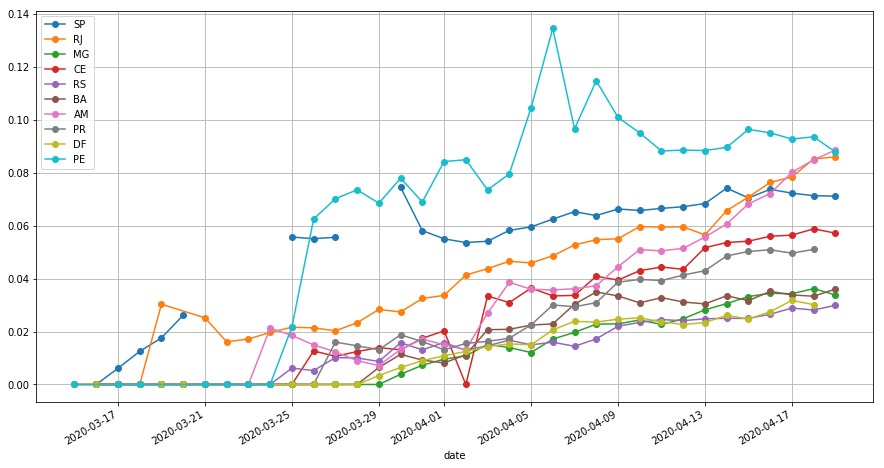

In [35]:
fig,ax = plt.subplots(1,1,figsize=(15,8))
for uf in ['SP','RJ','MG','CE','RS', 'BA', 'AM','PR','DF', 'PE']:
    df_states[(df_states.state==uf)]['2020-03-15':].cfr.plot(style='-o', label=uf)
ax.grid()
ax.legend();

In [63]:
df_states['data'] = [x.date() for x in df_states.index]
fig = px.scatter(df_states[df_states.data>datetime.date(2020,3,15)], x="confirmed", y="cfr", size="deaths", color="state",
#                  animation_frame="data",
                 hover_name="data", log_x=True, log_y=False, size_max=60)
fig.show()

In [27]:
df_states.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 947 entries, 2020-02-25 to 2020-04-19
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   state                           947 non-null    object        
 1   confirmed                       947 non-null    int64         
 2   deaths                          947 non-null    int64         
 3   is_last                         947 non-null    float64       
 4   estimated_population_2019       947 non-null    float64       
 5   city_ibge_code                  947 non-null    float64       
 6   confirmed_per_100k_inhabitants  947 non-null    float64       
 7   death_rate                      947 non-null    float64       
 8   cfr                             941 non-null    float64       
 9   data                            947 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
m

In [48]:
df_states[df_states.data>=datetime.date(2020,3,15)]

,state,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,cfr,data
date,,,,,,,,,,
2020-03-15,BA,9,0,0.0,3487219.0,5838208.0,0.95244,0.0000,0.000000,2020-03-15
2020-03-15,DF,14,0,0.0,3015268.0,5300108.0,0.46430,0.0000,0.000000,2020-03-15
2020-03-15,GO,4,0,0.0,1751760.0,10427512.0,0.62223,0.0000,0.000000,2020-03-15
2020-03-15,MS,2,0,0.0,895982.0,5002704.0,0.22322,0.0000,0.000000,2020-03-15
2020-03-15,PE,8,0,0.0,1645727.0,2611606.0,0.42534,0.0000,0.000000,2020-03-15
...,...,...,...,...,...,...,...,...,...,...
2020-04-19,RS,869,26,99.0,8163171.0,426871596.0,1345.40426,3.7168,0.029919,2020-04-19
2020-04-19,SC,1025,35,101.0,5530120.0,420990202.0,1952.98635,5.0069,0.034146,2020-04-19
2020-04-19,SE,86,5,14.0,1449648.0,39252871.0,75.90268,0.2345,0.058140,2020-04-19
